<a href="https://colab.research.google.com/github/doshimihir07/python_colab/blob/main/Learner_Notebook_Full_Code.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Project Python Foundations: FoodHub Data Analysis

### Context

The number of restaurants in New York is increasing day by day. Lots of students and busy professionals rely on those restaurants due to their hectic lifestyles. Online food delivery service is a great option for them. It provides them with good food from their favorite restaurants. A food aggregator company FoodHub offers access to multiple restaurants through a single smartphone app.

The app allows the restaurants to receive a direct online order from a customer. The app assigns a delivery person from the company to pick up the order after it is confirmed by the restaurant. The delivery person then uses the map to reach the restaurant and waits for the food package. Once the food package is handed over to the delivery person, he/she confirms the pick-up in the app and travels to the customer's location to deliver the food. The delivery person confirms the drop-off in the app after delivering the food package to the customer. The customer can rate the order in the app. The food aggregator earns money by collecting a fixed margin of the delivery order from the restaurants.

### Objective

The food aggregator company has stored the data of the different orders made by the registered customers in their online portal. They want to analyze the data to get a fair idea about the demand of different restaurants which will help them in enhancing their customer experience. Suppose you are hired as a Data Scientist in this company and the Data Science team has shared some of the key questions that need to be answered. Perform the data analysis to find answers to these questions that will help the company to improve the business.

### Data Description

The data contains the different data related to a food order. The detailed data dictionary is given below.

### Data Dictionary

* order_id: Unique ID of the order
* customer_id: ID of the customer who ordered the food
* restaurant_name: Name of the restaurant
* cuisine_type: Cuisine ordered by the customer
* cost_of_the_order: Cost of the order
* day_of_the_week: Indicates whether the order is placed on a weekday or weekend (The weekday is from Monday to Friday and the weekend is Saturday and Sunday)
* rating: Rating given by the customer out of 5
* food_preparation_time: Time (in minutes) taken by the restaurant to prepare the food. This is calculated by taking the difference between the timestamps of the restaurant's order confirmation and the delivery person's pick-up confirmation.
* delivery_time: Time (in minutes) taken by the delivery person to deliver the food package. This is calculated by taking the difference between the timestamps of the delivery person's pick-up confirmation and drop-off information

### Let us start by importing the required libraries

In [58]:
# Installing the libraries with the specified version.
!pip install numpy==1.25.2 pandas==1.5.3 matplotlib==3.7.1 seaborn==0.13.1 -q --user

**Note**: *After running the above cell, kindly restart the notebook kernel and run all cells sequentially from the start again.*

In [59]:
# import libraries for data manipulation
import numpy as np
import pandas as pd

# import libraries for data visualization
import matplotlib.pyplot as plt
import seaborn as sns

# to restrict the float value to 3 decimal places
pd.set_option('display.float_format', lambda x: '%.3f' % x)

### Understanding the structure of the data

In [60]:
# uncomment and run the following lines for Google Colab
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [61]:
# Write your code here to read the data
df=pd.read_csv('/content/drive/MyDrive/Python Course/foodhub_order.csv')

In [62]:
orig_data=df.copy()

In [63]:
# Write your code here to view the first 5 rows
df.head(5)

,order_id,customer_id,restaurant_name,cuisine_type,cost_of_the_order,day_of_the_week,rating,food_preparation_time,delivery_time
0,1477147,337525,Hangawi,Korean,30.750,Weekend,Not given,25,20
1,1477685,358141,Blue Ribbon Sushi Izakaya,Japanese,12.080,Weekend,Not given,25,23
2,1477070,66393,Cafe Habana,Mexican,12.230,Weekday,5,23,28
3,1477334,106968,Blue Ribbon Fried Chicken,American,29.200,Weekend,3,25,15
4,1478249,76942,Dirty Bird to Go,American,11.590,Weekday,4,25,24


### **Question 1:** How many rows and columns are present in the data? [0.5 mark]

In [64]:
# Write your code here
df.shape

(1898, 9)

#### Observations: there are 1898 rows and 9 columns present


### **Question 2:** What are the datatypes of the different columns in the dataset? (The info() function can be used) [0.5 mark]

In [65]:
# Write your code here
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1898 entries, 0 to 1897
Data columns (total 9 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   order_id               1898 non-null   int64  
 1   customer_id            1898 non-null   int64  
 2   restaurant_name        1898 non-null   object 
 3   cuisine_type           1898 non-null   object 
 4   cost_of_the_order      1898 non-null   float64
 5   day_of_the_week        1898 non-null   object 
 6   rating                 1898 non-null   object 
 7   food_preparation_time  1898 non-null   int64  
 8   delivery_time          1898 non-null   int64  
dtypes: float64(1), int64(4), object(4)
memory usage: 133.6+ KB


#### Observations: The datatypes of the different columns are: 4 are int, 4 are string/object and 1 is of float type


### **Question 3:** Are there any missing values in the data? If yes, treat them using an appropriate method. [1 mark]

In [66]:
# Write your code here
print(df.isnull().sum())

df['rating'].unique()


## Starting with checking the variables and unique values
df['rating'].unique()
# replacing values with nan where rating is not provided
df['rating'] = df['rating'].replace(['Not given'],np.nan)
df['rating'] = df['rating'].astype('float') # converting to float type from string type
df['rating'].unique() # confirming by checking unique values

# Impute missing values based on the average rating
df['rating'] = df['rating'].fillna(df['rating'].mean())

# Check if any resturant still has missing rating
df[df['rating'].isnull()]

order_id                 0
customer_id              0
restaurant_name          0
cuisine_type             0
cost_of_the_order        0
day_of_the_week          0
rating                   0
food_preparation_time    0
delivery_time            0
dtype: int64


,order_id,customer_id,restaurant_name,cuisine_type,cost_of_the_order,day_of_the_week,rating,food_preparation_time,delivery_time


#### Observations: There are no missing value, but for ratings field there are records with value as 'Not given'. So we are imputing the 'Not given' entries of rating with mean (avg) rating of all orders.

### **Question 4:** Check the statistical summary of the data. What is the minimum, average, and maximum time it takes for food to be prepared once an order is placed? [2 marks]

In [67]:
# Write your code here
df.describe()

,order_id,customer_id,cost_of_the_order,rating,food_preparation_time,delivery_time
count,1898.000,1898.000,1898.000,1898.000,1898.000,1898.000
mean,1477495.500,171168.478,16.499,4.344,27.372,24.162
std,548.050,113698.140,7.484,0.580,4.632,4.973
min,1476547.000,1311.000,4.470,3.000,20.000,15.000
25%,1477021.250,77787.750,12.080,4.000,23.000,20.000
50%,1477495.500,128600.000,14.140,4.344,27.000,25.000
75%,1477969.750,270525.000,22.297,5.000,31.000,28.000
max,1478444.000,405334.000,35.410,5.000,35.000,33.000


#### Observations:
Min food perparation time : 20 mins \
Average food preparation time : 27 mins \
Max food preparation time : 35 mins


### **Question 5:** How many orders are not rated? [1 mark]

In [68]:
orig_data['rating'].unique()

array(['Not given', '5', '3', '4'], dtype=object)

In [69]:
# Write the code here
orig_data[orig_data['rating']=='Not given'].shape[0]

736

#### Observations:
There are 736 orders which are not rated.

### Exploratory Data Analysis (EDA)

### Univariate Analysis

### **Question 6:** Explore all the variables and provide observations on their distributions. (Generally, histograms, boxplots, countplots, etc. are used for univariate exploration.) [9 marks]

In [70]:
# Write the code here
## checking unique values to confirm Nulls or invalid answers
df['order_id'].unique()
df['customer_id'].unique()
df['restaurant_name'].unique()
df['cuisine_type'].unique()
df['cost_of_the_order'].unique()
df['day_of_the_week'].unique()
df['food_preparation_time'].unique()
df['delivery_time'].unique()
df['rating'].unique()

array([4.34423408, 5.        , 3.        , 4.        ])

In [71]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
order_id,1898.000,1477495.500,548.050,1476547.000,1477021.250,1477495.500,1477969.750,1478444.000
customer_id,1898.000,171168.478,113698.140,1311.000,77787.750,128600.000,270525.000,405334.000
cost_of_the_order,1898.000,16.499,7.484,4.470,12.080,14.140,22.297,35.410
rating,1898.000,4.344,0.580,3.000,4.000,4.344,5.000,5.000
food_preparation_time,1898.000,27.372,4.632,20.000,23.000,27.000,31.000,35.000
delivery_time,1898.000,24.162,4.973,15.000,20.000,25.000,28.000,33.000


In [72]:
## Checking for outliers, repeated this part for all fields to check for a pattern.
Q1 = df['cost_of_the_order'].quantile(0.25)
Q3 = df['cost_of_the_order'].quantile(0.75)
IQR = Q3 - Q1

lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

outliers = df[(df['cost_of_the_order'] < lower_bound) | (df['cost_of_the_order'] > upper_bound)]
outliers

## Observation : No outliers found in data for any fields

,order_id,customer_id,restaurant_name,cuisine_type,cost_of_the_order,day_of_the_week,rating,food_preparation_time,delivery_time


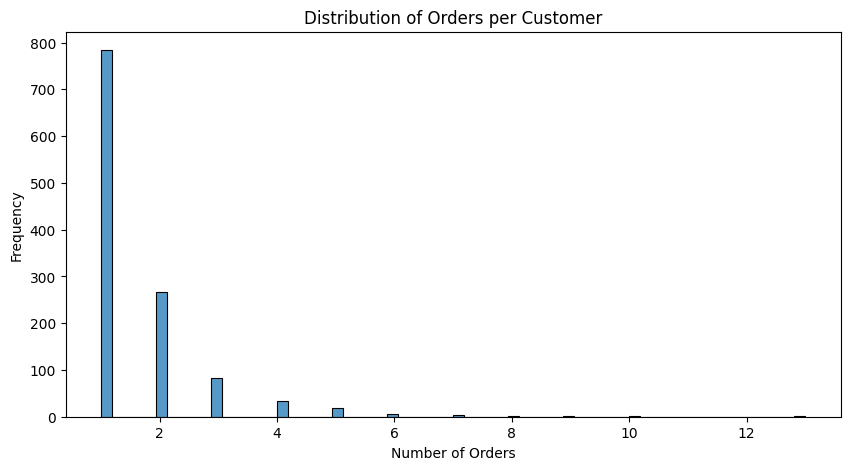

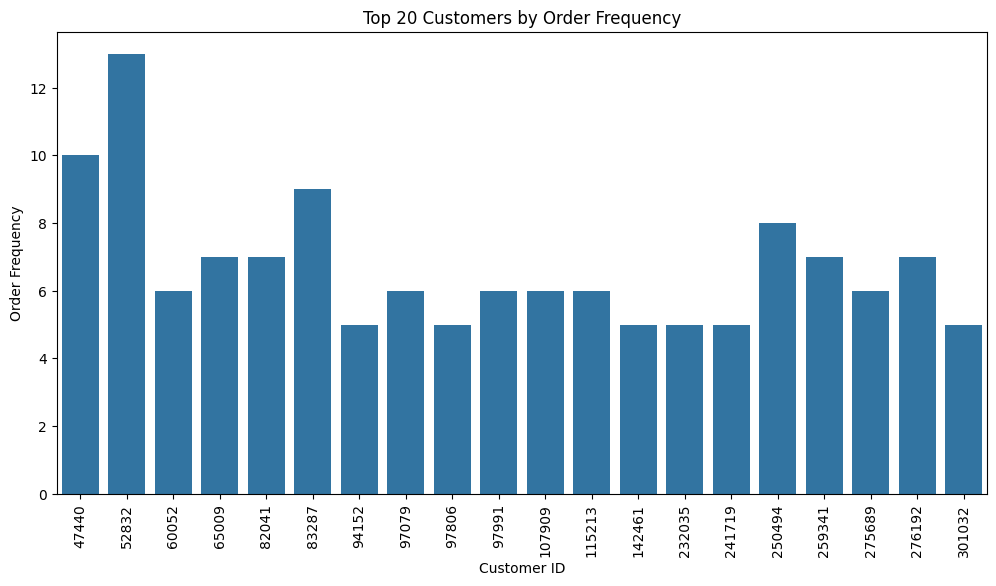

In [73]:
## Univariant analysis of customer_id

# Checking how many customers are frequent/return customers
plt.figure(figsize=(10,5))
sns.histplot(df['customer_id'].value_counts(), kde=False)
plt.title('Distribution of Orders per Customer')
plt.xlabel('Number of Orders')
plt.ylabel('Frequency')
plt.show()

# Checking frequency of orders per customer using a barplot
# Calculate order frequency for each customer
order_frequency = df['customer_id'].value_counts().head(20)  # Top 20 customers


# Plot
plt.figure(figsize=(12, 6))  # Increase figure size to prevent cramping
sns.barplot(x=order_frequency.index, y=order_frequency.values)
plt.title('Top 20 Customers by Order Frequency')
plt.xlabel('Customer ID')
plt.ylabel('Order Frequency')
plt.xticks(rotation=90)  # Rotate x-axis labels for better visibility
plt.show()


## Observation 1 : Most customers order only once,some order twice, so not a lot of return customers.
## Observation 2 : customer_id 52832 placed most orders (13 orders), followed by customer_id 47440

Total unique restaurants: 178


<ipython-input-74-37d41831da62>:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=top_restaurant_counts.values, y=top_restaurant_counts.index, palette='viridis')


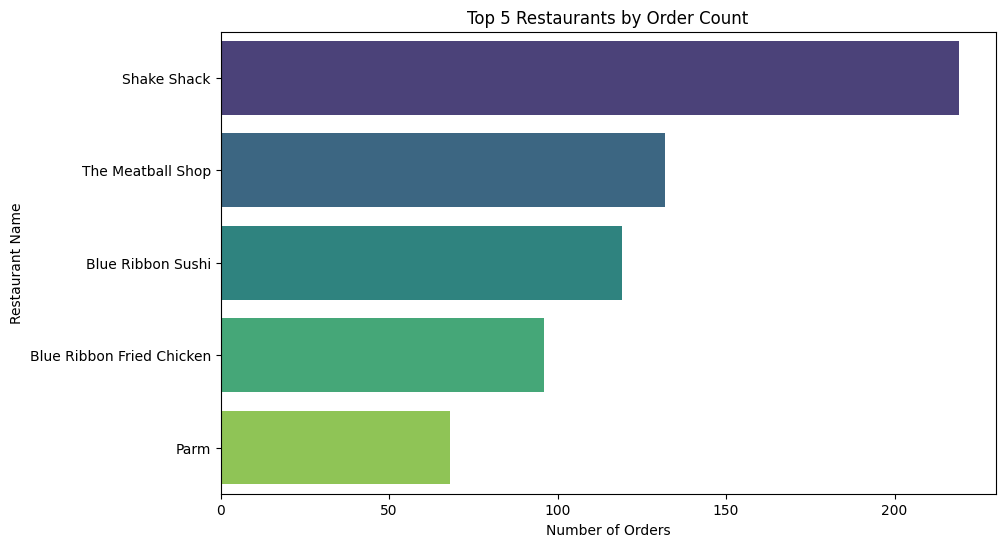

In [74]:
## Univariant analysis of restaurant_name

print(f"Total unique restaurants: {df['restaurant_name'].nunique()}")

top_restaurant_counts = df['restaurant_name'].value_counts().head(5)

plt.figure(figsize=(10, 6))
sns.barplot(x=top_restaurant_counts.values, y=top_restaurant_counts.index, palette='viridis')
plt.xlabel('Number of Orders')
plt.ylabel('Restaurant Name')
plt.title(f'Top 5 Restaurants by Order Count')
plt.show();



## Observation 1: Total unique restaurants 178
## Observation 2: Shake Shack has handled the most orders by volume (219)

Total unique restaurants: 14
Most common cuisine types
cuisine_type
American    584
Japanese    470
Italian     298
Chinese     215
Mexican      77
Name: count, dtype: int64
Least common cuisine types
cuisine_type
French        18
Southern      17
Korean        13
Spanish       12
Vietnamese     7
Name: count, dtype: int64


<ipython-input-75-d9adac31f121>:10: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=df['cuisine_type'].value_counts().head(5).values, y=df['cuisine_type'].value_counts().head(5).index, palette='viridis')


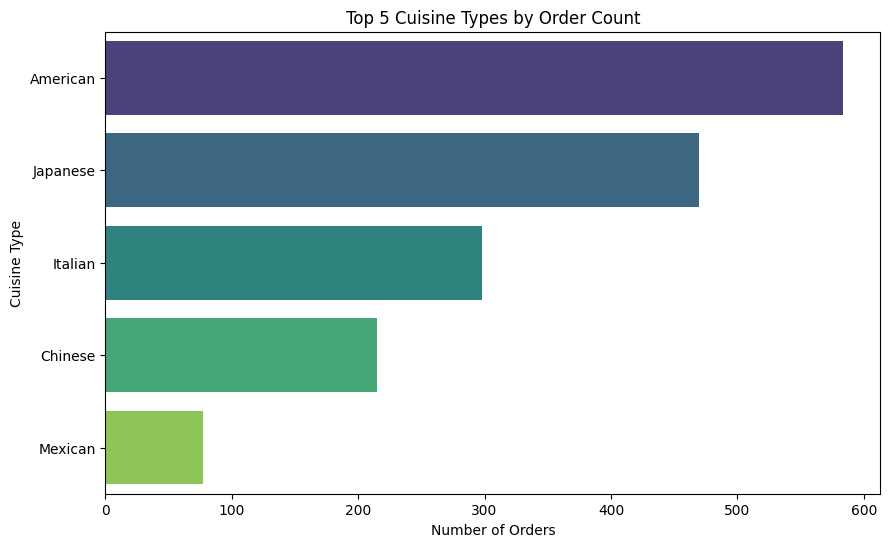

In [75]:
## Univariant analysis of cuisine_type
print(f"Total unique restaurants: {df['cuisine_type'].nunique()}")

print ("Most common cuisine types")
print(df['cuisine_type'].value_counts().head(5))
print ("Least common cuisine types")
print(df['cuisine_type'].value_counts().tail(5))

plt.figure(figsize=(10, 6))
sns.barplot(x=df['cuisine_type'].value_counts().head(5).values, y=df['cuisine_type'].value_counts().head(5).index, palette='viridis')
plt.xlabel('Number of Orders')
plt.ylabel('Cuisine Type')
plt.title(f'Top 5 Cuisine Types by Order Count')
plt.show();


## Observation 1: There are 14 unique cuisines servered in these resturants
## Observation 2: American is most common (servered in 584 resturants) and Vietnamese is least common (servered in only 7 resturants)

count   1898.000
mean      16.499
std        7.484
min        4.470
25%       12.080
50%       14.140
75%       22.297
max       35.410
Name: cost_of_the_order, dtype: float64
The most frequent order value is: 12.18 (Frequency: 86)


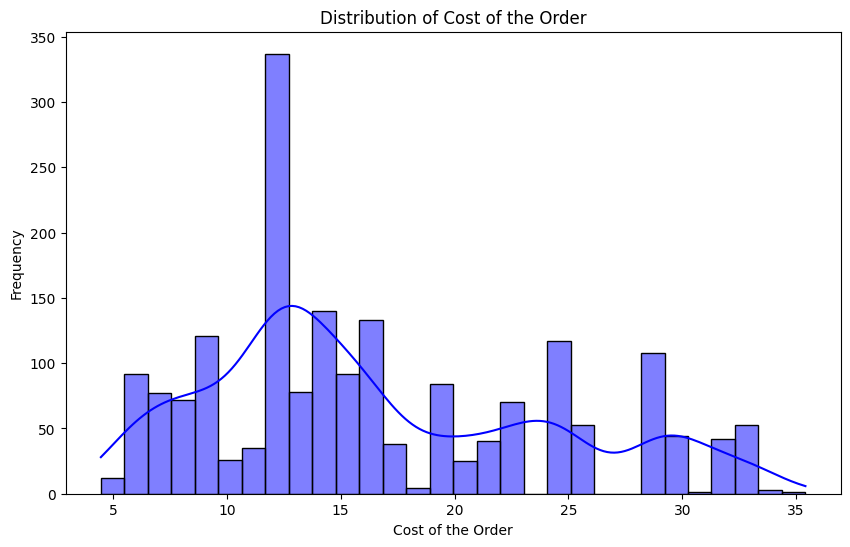

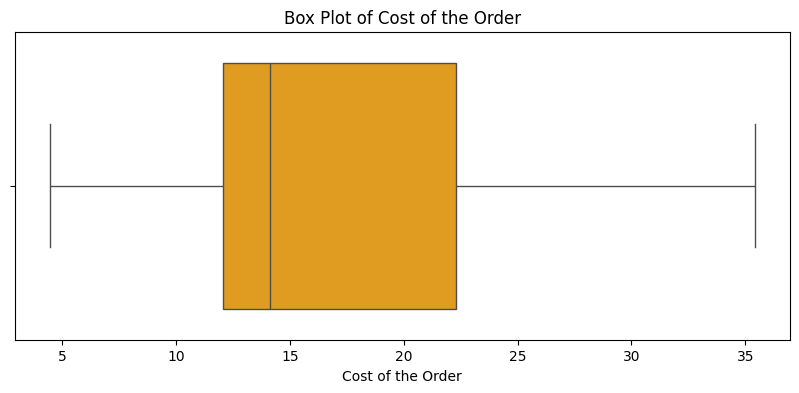

In [76]:
## Univariant analysis of cost_of_the_order

print(df['cost_of_the_order'].describe())

most_frequent_value = df['cost_of_the_order'].value_counts().idxmax()
frequency = df['cost_of_the_order'].value_counts().max()

print(f"The most frequent order value is: {most_frequent_value} (Frequency: {frequency})")


plt.figure(figsize=(10, 6))
sns.histplot(df['cost_of_the_order'], kde=True, bins=30, color='blue')
plt.title('Distribution of Cost of the Order')
plt.xlabel('Cost of the Order')
plt.ylabel('Frequency')
plt.show()

plt.figure(figsize=(10, 4))
sns.boxplot(x=df['cost_of_the_order'], color='orange')
plt.title('Box Plot of Cost of the Order')
plt.xlabel('Cost of the Order')
plt.show()


## Observation 1: Minimum order value is 4.47 and the highest order value is 35.41. The average order value is 16.49
## Observation 2: The most common order value is 12.18 (ordered 86 times)


Proportion of orders:
day_of_the_week
Weekend   71.180
Weekday   28.820
Name: count, dtype: float64


<ipython-input-77-720cdc7b1d95>:12: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=day_counts.index, y=day_counts.values, palette="pastel")


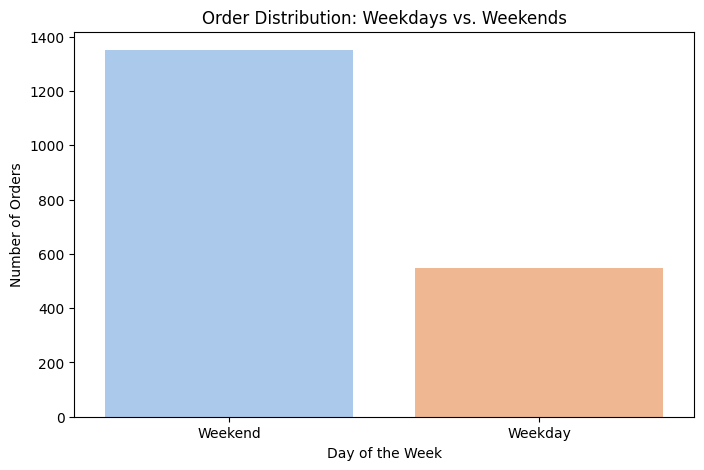

In [77]:
## Univariant analysis of day_of_the_week
# find average orders for weekdays and weekends which are values of day_of_the_week
day_counts = df['day_of_the_week'].value_counts()

total_orders = day_counts.sum()
proportions = (day_counts / total_orders) * 100
print("Proportion of orders:")
print(proportions)


plt.figure(figsize=(8, 5))
sns.barplot(x=day_counts.index, y=day_counts.values, palette="pastel")
plt.title("Order Distribution: Weekdays vs. Weekends")
plt.xlabel("Day of the Week")
plt.ylabel("Number of Orders")
plt.show()


## Observation 1: Weekends recieve 71% of the orders and weekdays get 28%


Proportion of ratings:
rating
4.344   38.778
5.000   30.980
4.000   20.337
3.000    9.905
Name: count, dtype: float64


<ipython-input-78-c350622da534>:10: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=ratings_counts.index, y=ratings_counts.values, palette="pastel")


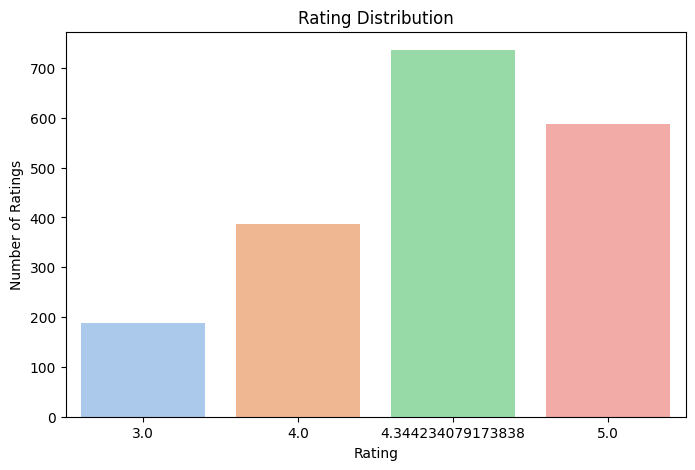

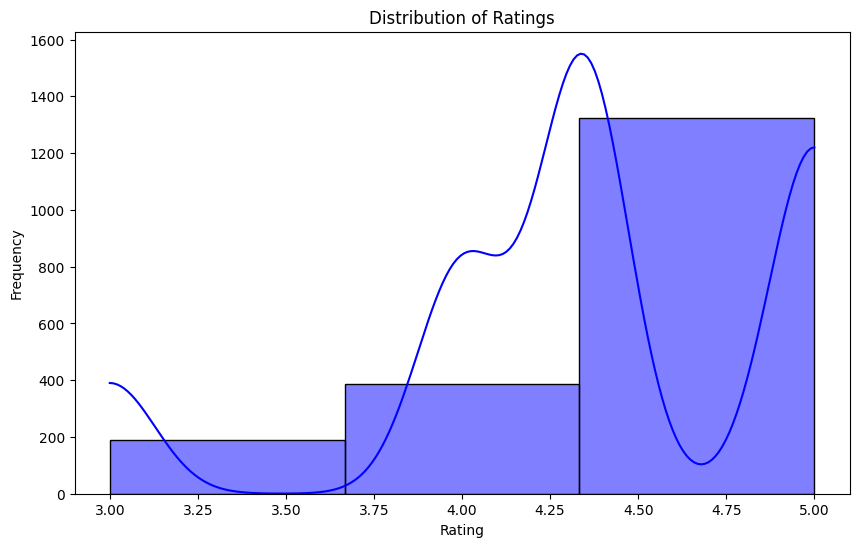

In [78]:
## Univariant analysis of rating
ratings_counts = df['rating'].value_counts()

total_ratings = ratings_counts.sum()
proportions = (ratings_counts / total_ratings) * 100
print("Proportion of ratings:")
print(proportions)

plt.figure(figsize=(8, 5))
sns.barplot(x=ratings_counts.index, y=ratings_counts.values, palette="pastel")
plt.title("Rating Distribution")
plt.xlabel("Rating")
plt.ylabel("Number of Ratings")

plt.figure(figsize=(10, 6))
sns.histplot(df['rating'], bins=3, kde=True, color='blue')
plt.title('Distribution of Ratings')
plt.xlabel('Rating')
plt.ylabel('Frequency')
plt.show()


# Observation 1: for 38% of the orders there was no rating which were imputed with mean of 4.344
# Observation 2: 30% had rating of 5 and worst rating was 3 with 9.9% giving that rating.

count   1898.000
mean      27.372
std        4.632
min       20.000
25%       23.000
50%       27.000
75%       31.000
max       35.000
Name: food_preparation_time, dtype: float64
Mean Preparation Time: 27.371970495258168
Median Preparation Time: 27.0
Mode Preparation Time: 0    21
Name: food_preparation_time, dtype: int64


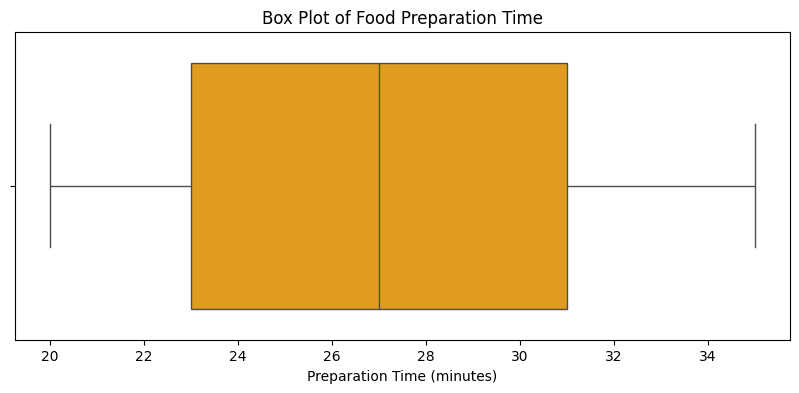

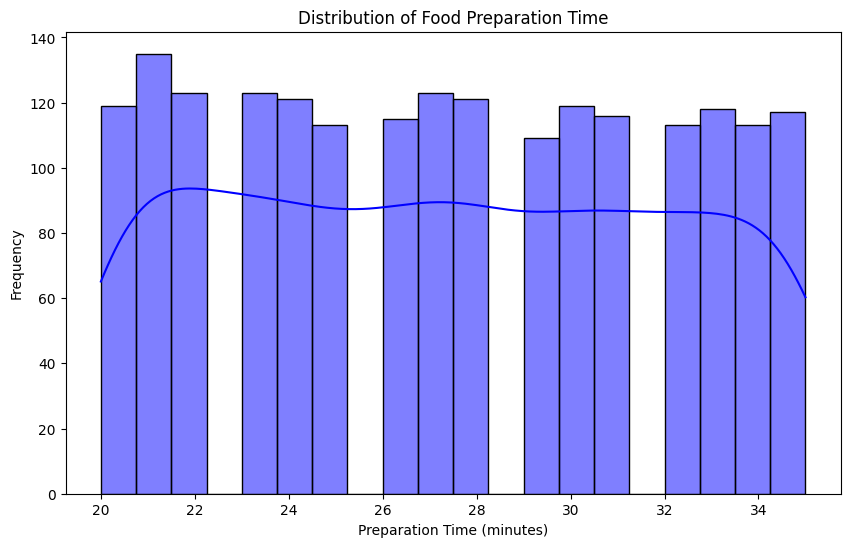

<ipython-input-79-b3e77a975d5d>:34: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='prep_time_category', data=df, palette="coolwarm")


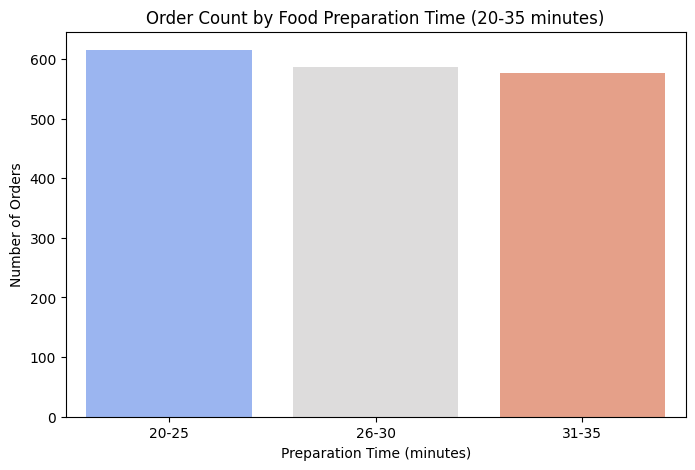

In [79]:
## Univariant analysis of food_preparation_time

print (df['food_preparation_time'].describe())
mean_prep_time = df['food_preparation_time'].mean()
median_prep_time = df['food_preparation_time'].median()
mode_prep_time = df['food_preparation_time'].mode()

print(f"Mean Preparation Time: {mean_prep_time}")
print(f"Median Preparation Time: {median_prep_time}")
print(f"Mode Preparation Time: {mode_prep_time}")

plt.figure(figsize=(10, 4))
sns.boxplot(x=df['food_preparation_time'], color='orange')
plt.title('Box Plot of Food Preparation Time')
plt.xlabel('Preparation Time (minutes)')
plt.show()


plt.figure(figsize=(10, 6))
sns.histplot(df['food_preparation_time'], bins=20, kde=True, color='blue')
plt.title('Distribution of Food Preparation Time')
plt.xlabel('Preparation Time (minutes)')
plt.ylabel('Frequency')
plt.show()


# Create bins for food preparation times
bins = [20, 25, 30, 35]
labels = ['20-25', '26-30', '31-35']
df['prep_time_category'] = pd.cut(df['food_preparation_time'], bins=bins, labels=labels)

# Plot the countplot
plt.figure(figsize=(8, 5))
sns.countplot(x='prep_time_category', data=df, palette="coolwarm")
plt.title('Order Count by Food Preparation Time (20-35 minutes)')
plt.xlabel('Preparation Time (minutes)')
plt.ylabel('Number of Orders')
plt.show()


# Observation 1: The avg preparation time is 27.3 mins
# Observation 2: The most common prepartion time is 21 mins. But other than that the frequency is fairly distributed



count   1898.000
mean      24.162
std        4.973
min       15.000
25%       20.000
50%       25.000
75%       28.000
max       33.000
Name: delivery_time, dtype: float64
0    24
Name: delivery_time, dtype: int64


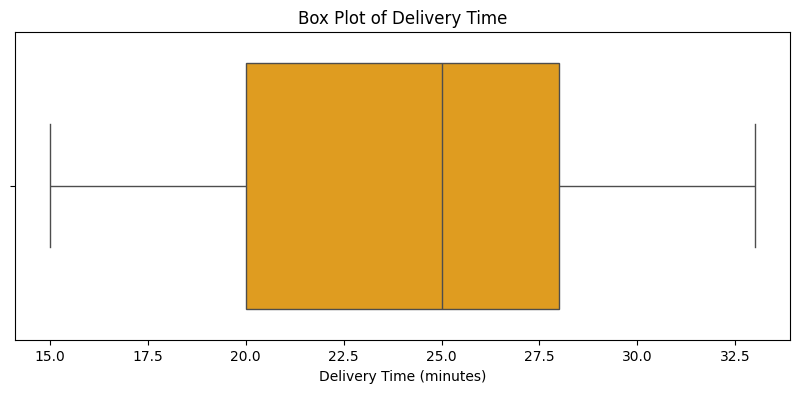

<ipython-input-80-dfba1342214c>:24: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='delv_time_category', data=df, palette="coolwarm")


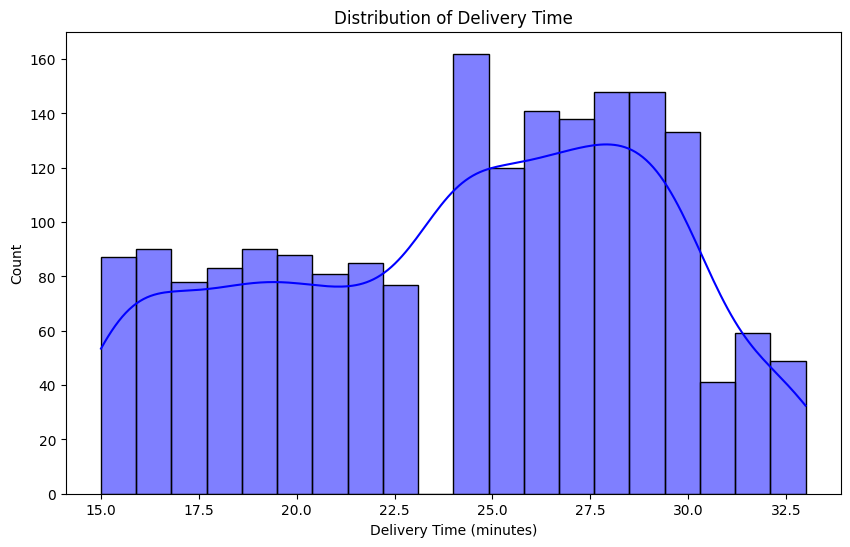

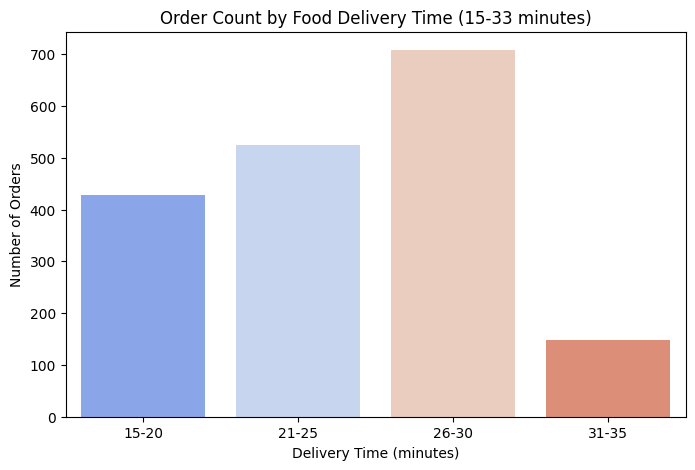

In [80]:
# Univariant analysis of delivery_time
print(df['delivery_time'].describe())
print(df['delivery_time'].mode())

plt.figure(figsize=(10, 4))
sns.boxplot(x=df['delivery_time'], color='orange')
plt.title('Box Plot of Delivery Time')
plt.xlabel('Delivery Time (minutes)')
plt.show()

plt.figure(figsize=(10, 6))
sns.histplot(df['delivery_time'], bins=20, kde=True, color='blue')
plt.title('Distribution of Delivery Time')
plt.xlabel('Delivery Time (minutes)')


# Create bins for food preparation times
bins = [15, 20, 25, 30, 35]
labels = ['15-20','21-25', '26-30', '31-35']
df['delv_time_category'] = pd.cut(df['delivery_time'], bins=bins, labels=labels)

# Plot the countplot
plt.figure(figsize=(8, 5))
sns.countplot(x='delv_time_category', data=df, palette="coolwarm")
plt.title('Order Count by Food Delivery Time (15-33 minutes)')
plt.xlabel('Delivery Time (minutes)')
plt.ylabel('Number of Orders')
plt.show()

## Observation 1 : Delivery time ranges from 15 mins to 33 mins with most common delivery time being 24 mins.
## Observation 2 : Most orders are delivered within 26 to 30 mins range

#### Observations:


1.   No outliers found in data for any fields
2.   Most customers order only once,some order twice, so not a lot of return customers.
3.   customer_id 52832 placed most orders (13 orders), followed by customer_id 47440
4.   Total unique restaurants 178
5.   Shake Shack has handled the most orders by volume (219)
6.   There are 14 unique cuisines servered in these resturants
7.   American is most common (servered in 584 resturants) and Vietnamese is lease common (servered in only 7 resturants)
8.   Minimum order value is 4.47 and the highest order value is 35.41. The average order value is 16.49
9.   The most common order value is 12.18 (ordered 86 times)
10.  Weekends recieve 71% of the orders and weekdays get 28%
11.  38% of the orders there was no rating which were imputed with mean of 4.344
12.  30% had rating of 5 and worst rating was 3 with 9.9% giving that rating.
13.  The avg preparation time is 27.3 mins
14.  The most common prepartion time is 21 mins. But other than that the frequency is fairly distributed
15.  Delivery time ranges from 15 mins to 33 mins with most common delivery time being 24 mins.
16.  Most orders are delivered within 26 to 30 mins range

### **Question 7**: Which are the top 5 restaurants in terms of the number of orders received? [1 mark]

In [81]:
# Write the code here
top_restaurants = df['restaurant_name'].value_counts().head(5)
top_restaurants

,count
restaurant_name,
Shake Shack,219
The Meatball Shop,132
Blue Ribbon Sushi,119
Blue Ribbon Fried Chicken,96
Parm,68


#### Observations:
The top 5 resturants are as follows :
1. Shake Shack	with 219 orders \
2. The Meatball Shop with 132 orders \
3. Blue Ribbon Sushi	with 119 orders \
4. Blue Ribbon Fried Chicken with	96 orders\
5. Parm with 68 orders

### **Question 8**: Which is the most popular cuisine on weekends? [1 mark]

In [82]:
# Write the code here
df.loc[df['day_of_the_week']=='Weekend'].cuisine_type.value_counts().idxmax()



'American'

#### Observations: American is the most popular cuisine on weekends.

### **Question 9**: What percentage of the orders cost more than 20 dollars? [2 marks]

In [83]:
# Write the code here
df[df['cost_of_the_order']>20].shape[0]/df.shape[0]*100

29.24130663856691

#### Observations: 29.24% of the orders cost over $20


### **Question 10**: What is the mean order delivery time? [1 mark]

In [84]:
# Write the code here
df['delivery_time'].mean()

24.161749209694417

#### Observations: Mean order delivery time is 24.16 mins

### **Question 11:** The company has decided to give 20% discount vouchers to the top 3 most frequent customers. Find the IDs of these customers and the number of orders they placed. [1 mark]

In [85]:
# Write the code here
df['customer_id'].value_counts().head(3)

,count
customer_id,
52832,13
47440,10
83287,9


#### Observations: The customer ids of the top 3 most frequent customers is 52832 (13 orders placed), 47440 (10 orders placed) and 83287 (9 orders placed)

### Multivariate Analysis

### **Question 12**: Perform a multivariate analysis to explore relationships between the important variables in the dataset. (It is a good idea to explore relations between numerical variables as well as relations between numerical and categorical variables) [10 marks]


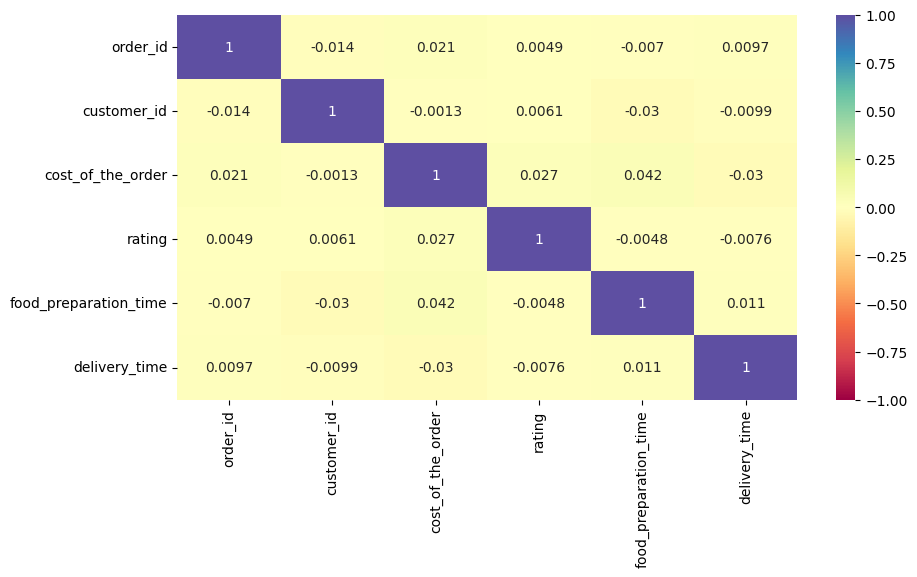

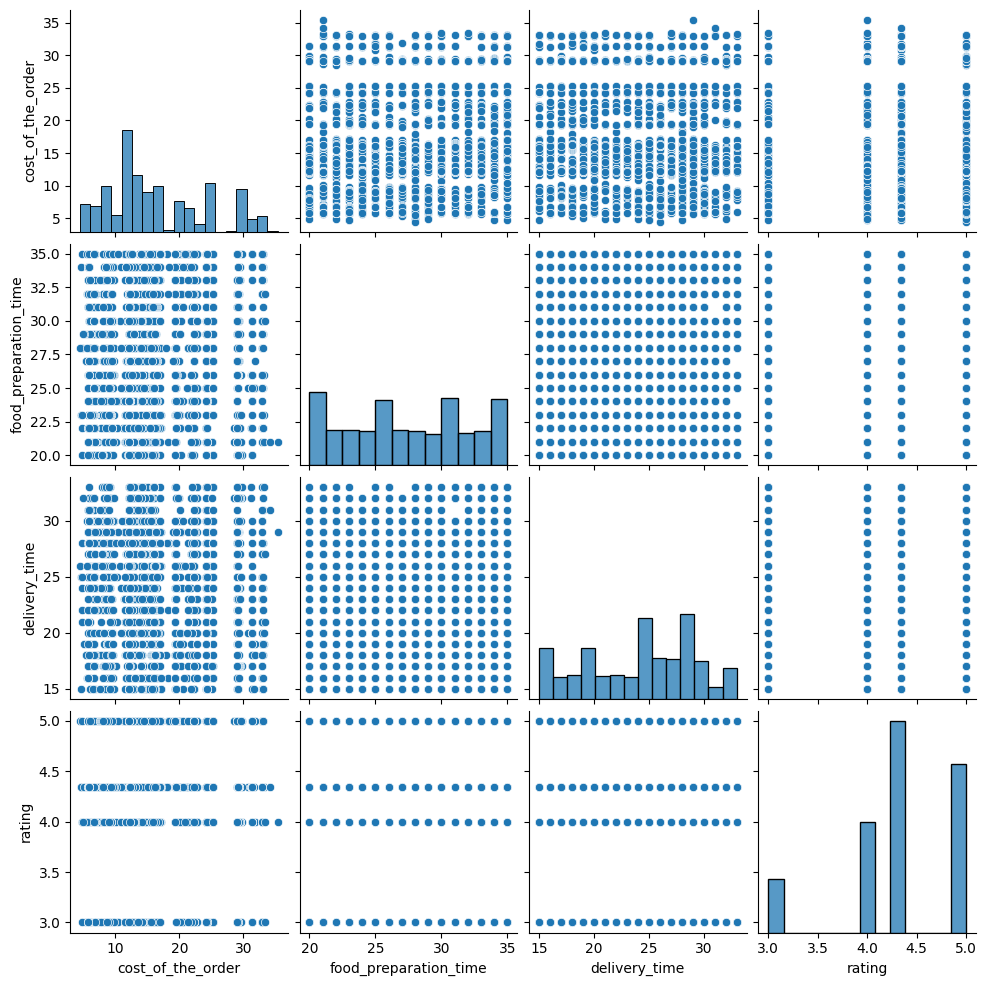

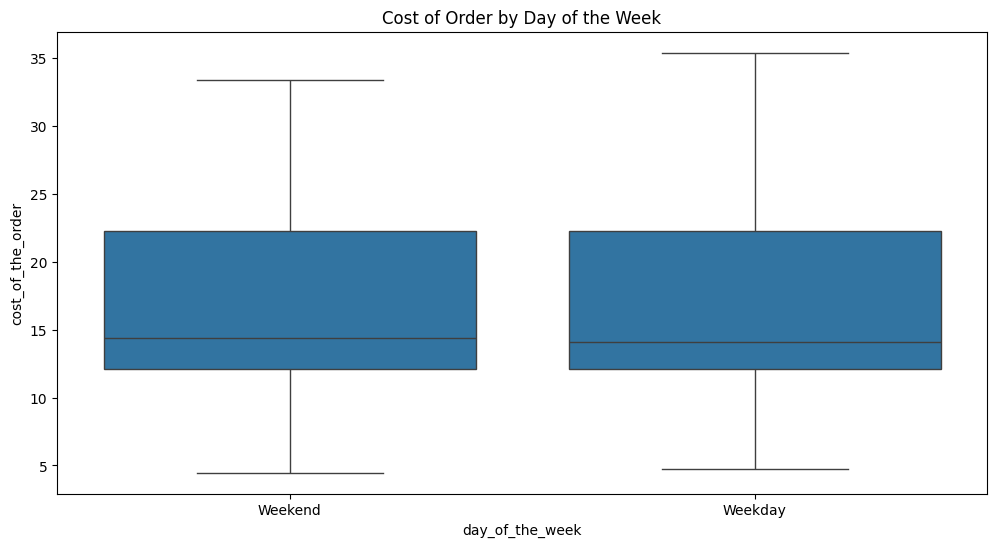

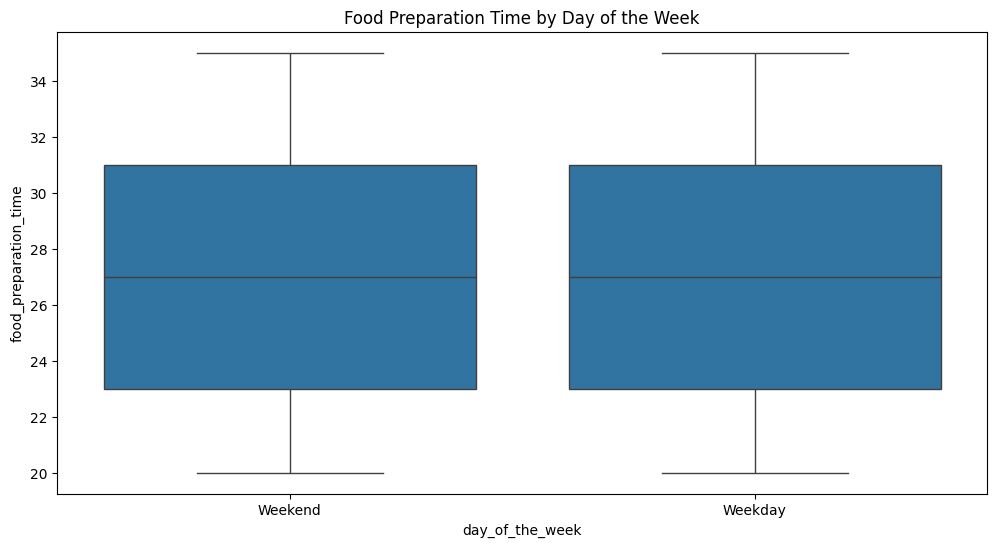

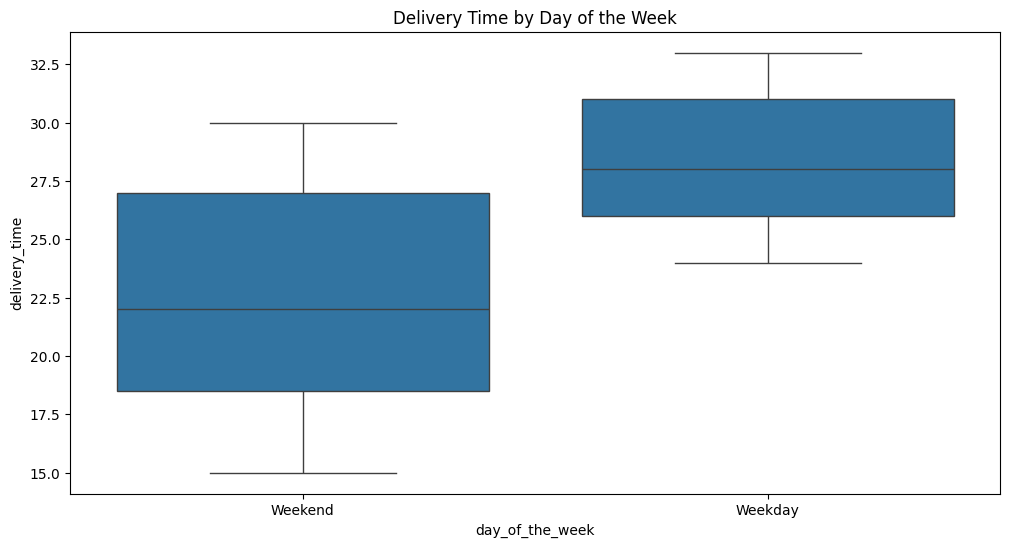

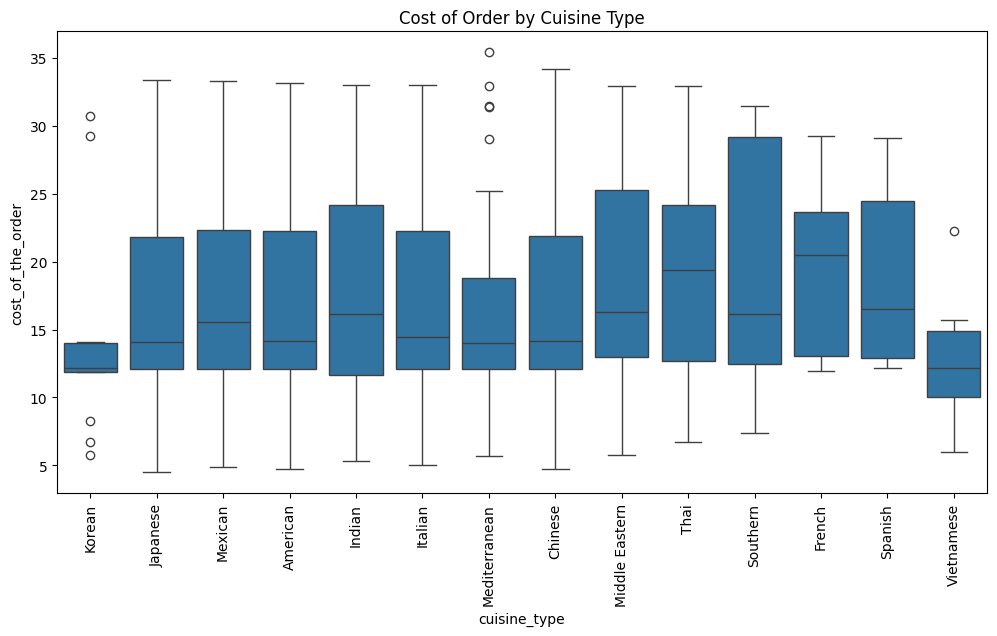

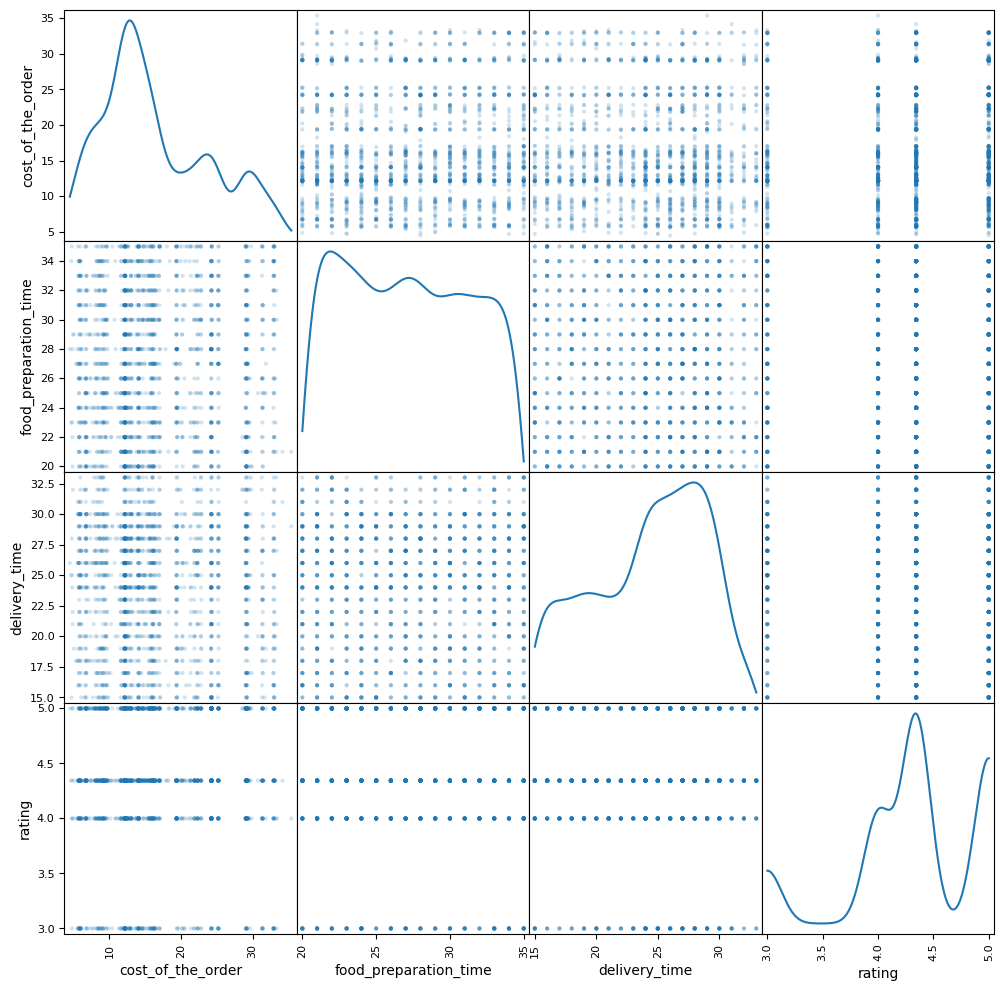

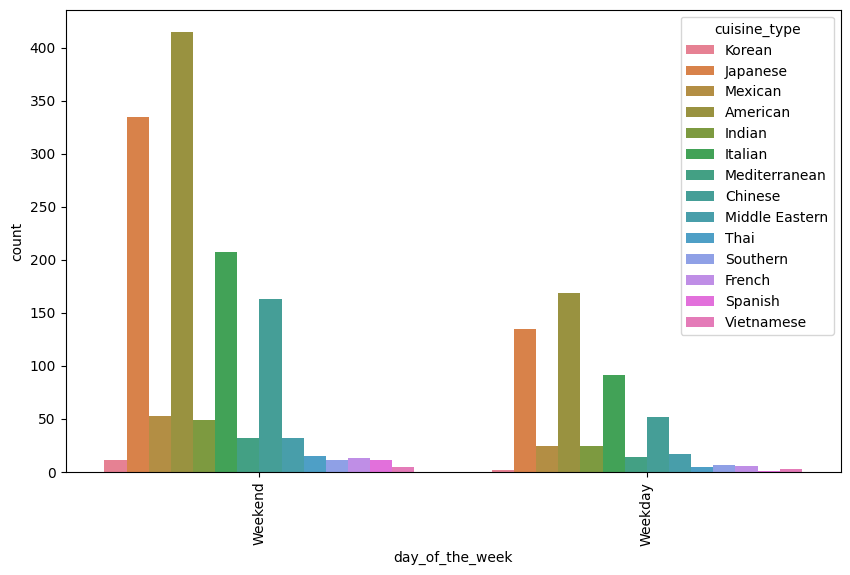

In [87]:
# Perform a multivariate analysis to explore relationships between the important numerical variables in the dataset.

# Correlation matrix
plt.figure(figsize=(10, 5))
sns.heatmap(df.corr(numeric_only=True), annot=True, cmap='Spectral', vmin=-1, vmax=1)
plt.show()

# Pairplot for numerical variables
sns.pairplot(df[['cost_of_the_order', 'food_preparation_time', 'delivery_time', 'rating']])
plt.show()

# Boxplot for numerical variables grouped by day of the week
plt.figure(figsize=(12, 6))
sns.boxplot(x='day_of_the_week', y='cost_of_the_order', data=df)
plt.title('Cost of Order by Day of the Week')
plt.show()

plt.figure(figsize=(12, 6))
sns.boxplot(x='day_of_the_week', y='food_preparation_time', data=df)
plt.title('Food Preparation Time by Day of the Week')
plt.show()


plt.figure(figsize=(12, 6))
sns.boxplot(x='day_of_the_week', y='delivery_time', data=df)
plt.title('Delivery Time by Day of the Week')
plt.show()


# Boxplot for numerical variables grouped by cuisine type
plt.figure(figsize=(12, 6))
sns.boxplot(x='cuisine_type', y='cost_of_the_order', data=df)
plt.xticks(rotation=90)
plt.title('Cost of Order by Cuisine Type')
plt.show()


# Scatterplot matrix for selected variables
from pandas.plotting import scatter_matrix
scatter_matrix(df[['cost_of_the_order', 'food_preparation_time', 'delivery_time', 'rating']], alpha=0.2, figsize=(12, 12), diagonal='kde')
plt.show()


# Barplot for categorical variables grouped by day of the week
plt.figure(figsize=(10,6))
sns.countplot(x='day_of_the_week', hue='cuisine_type', data=df)
plt.xticks(rotation=90)
plt.show()

# Observations from Multivariate Analysis:

1. Correlation Matrix:
   - Weak positive correlations observed between 'cost_of_the_order' and 'food_preparation_time'. This suggests that more expensive orders might take slightly longer to prepare.
   - 'food_preparation_time' and 'delivery_time' show a weak positive correlation which is intuitive.
   - No strong correlations are observed between any variables, indicating no single variable overwhelmingly influences another.

2. Pairplot:
   - The pairplot visually confirms the weak positive relationships seen in the correlation matrix.
   - The distribution of 'rating' seems somewhat bimodal with a peak around 4.34 to 5.0 and another smaller peak around 3.0.

3. Boxplots (Day of the Week vs. Numerical Variables):
   - Food delivery time is generally higher for weekdays compared to weekends.

4. Boxplots (Cuisine Type vs. Cost of Order):
   - Different cuisine types have varying cost distributions, indicating that certain cuisines might generally be more expensive than others.  Visual inspection confirms French cuisine has the highest avg cost per order, least is Vietnamese.

6. Barplot (Day of the Week and Cuisine Type):
   -  American and Japanese are generally more popular than other cuisines on both weekend and weekday. But the distribution trend by cuisine accorss weekend is similar to that on weekday.


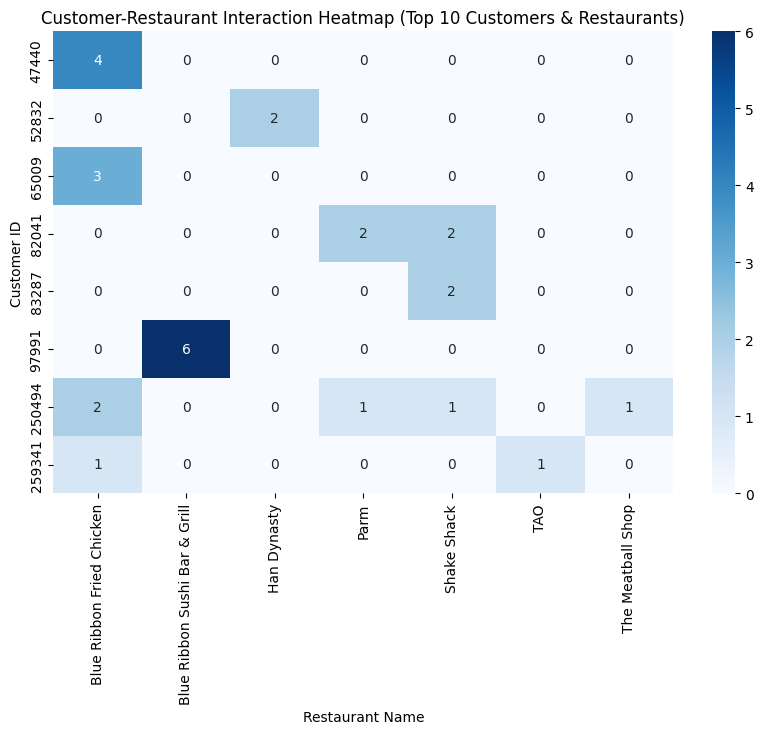

In [91]:
# Multivariant analysis to compare between categorical variables with numeric variables
# Comparing customer id and resturant name

# Step 1: Identify top customers
top_customers = df['customer_id'].value_counts().head(10).index  # Top 10 customers

# Step 2: Identify top restaurants
top_restaurants = df['restaurant_name'].value_counts().head(10).index  # Top 10 restaurants

# Step 3: Filter data
filtered_data = df[(df['customer_id'].isin(top_customers)) & (df['restaurant_name'].isin(top_restaurants))]
interaction_data = filtered_data.groupby(['customer_id', 'restaurant_name']).size().reset_index(name='order_count')

# Step 4: Create pivot table for heatmap
heatmap_data = interaction_data.pivot(index='customer_id', columns='restaurant_name', values='order_count').fillna(0)

# Plot heatmap
plt.figure(figsize=(10, 6))
sns.heatmap(heatmap_data, cmap="Blues", annot=True, fmt=".0f", cbar=True)
plt.title('Customer-Restaurant Interaction Heatmap (Top 10 Customers & Restaurants)')
plt.xlabel('Restaurant Name')
plt.ylabel('Customer ID')
plt.show()

# Observation 1. Customer id 97991 has ordered most from a single resturant called Blue ribbon sushi bar and grill.


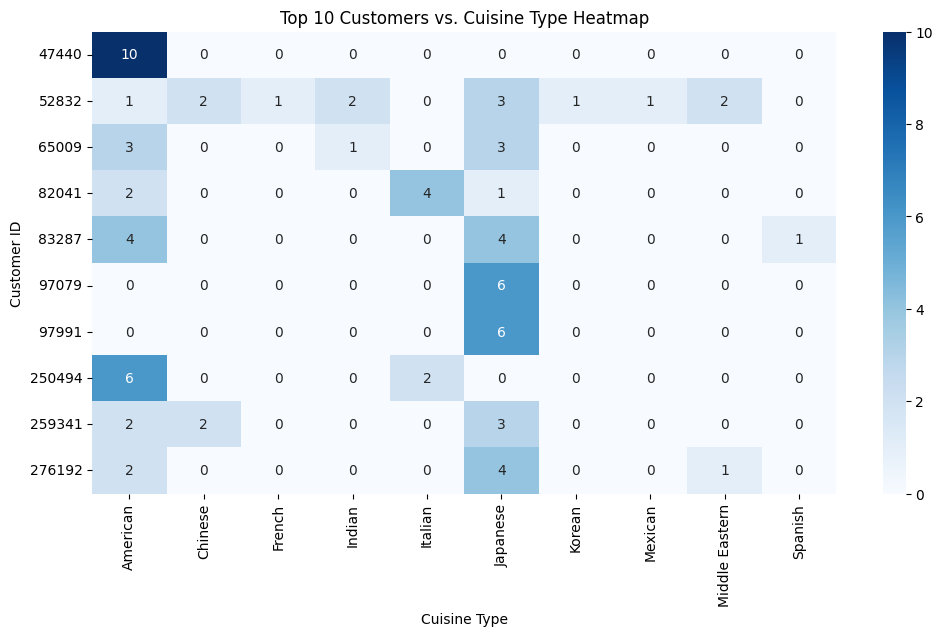

In [90]:
# Get top 10 customers by total orders
top_customers = df['customer_id'].value_counts().head(10).index

# Filter data for top customers
filtered_data = df[df['customer_id'].isin(top_customers)]

# Pivot for heatmap
heatmap_data = filtered_data.groupby(['customer_id', 'cuisine_type']).size().unstack().fillna(0)

# Plot heatmap
plt.figure(figsize=(12, 6))
sns.heatmap(heatmap_data, cmap="Blues", annot=True, fmt=".0f")
plt.title('Top 10 Customers vs. Cuisine Type Heatmap')
plt.xlabel('Cuisine Type')
plt.ylabel('Customer ID')
plt.show()

# Observation 2. Customer id 47440 has ordered the most for a single cuisine (American 10 times)
# Observation 3. Customer id 97079 and 97991 has only every ordered Japansese cuisine.


In [92]:
# Group by customer_id and count unique restaurant names
unique_restaurants_per_customer = df.groupby('customer_id')['restaurant_name'].nunique()

# Find the maximum number of unique restaurants ordered from
max_restaurants = unique_restaurants_per_customer.max()

# Identify the customer(s) with the maximum number of unique restaurants
customers_with_max_restaurants = unique_restaurants_per_customer[unique_restaurants_per_customer == max_restaurants]

# Display the result
print("Customer(s) with the most unique restaurants:")
print(customers_with_max_restaurants)




Customer(s) with the most unique restaurants:
customer_id
52832    8
Name: restaurant_name, dtype: int64


In [93]:
# Group by customer_id and count unique cuisine
unique_cuisine_per_customer = df.groupby('customer_id')['cuisine_type'].nunique()

# Find the maximum number of unique cuisine ordered from
max_cuisine = unique_cuisine_per_customer.max()

# Identify the customer(s) with the maximum number of unique cuisine
customers_with_max_cuisine = unique_cuisine_per_customer[unique_cuisine_per_customer == max_cuisine]

# Display the result
print("Customer(s) with the most unique cuisine:")
print(customers_with_max_cuisine)

# Observation 4. Customer id 52832 has tried the most resturants at 8 and customer id has tried the most cuisines at 8.

Customer(s) with the most unique cuisine:
customer_id
52832    8
Name: cuisine_type, dtype: int64


Slowest food preparing resturant
restaurant_name
Sushi Choshi   35.000
Klong          35.000
Name: food_preparation_time, dtype: float64
Fastest food preparing resturant
restaurant_name
Haru Gramercy Park   20.000
Name: food_preparation_time, dtype: float64


<ipython-input-95-e3577595196b>:15: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='restaurant_name', y='food_preparation_time', data=filtered_df, palette='Set2')


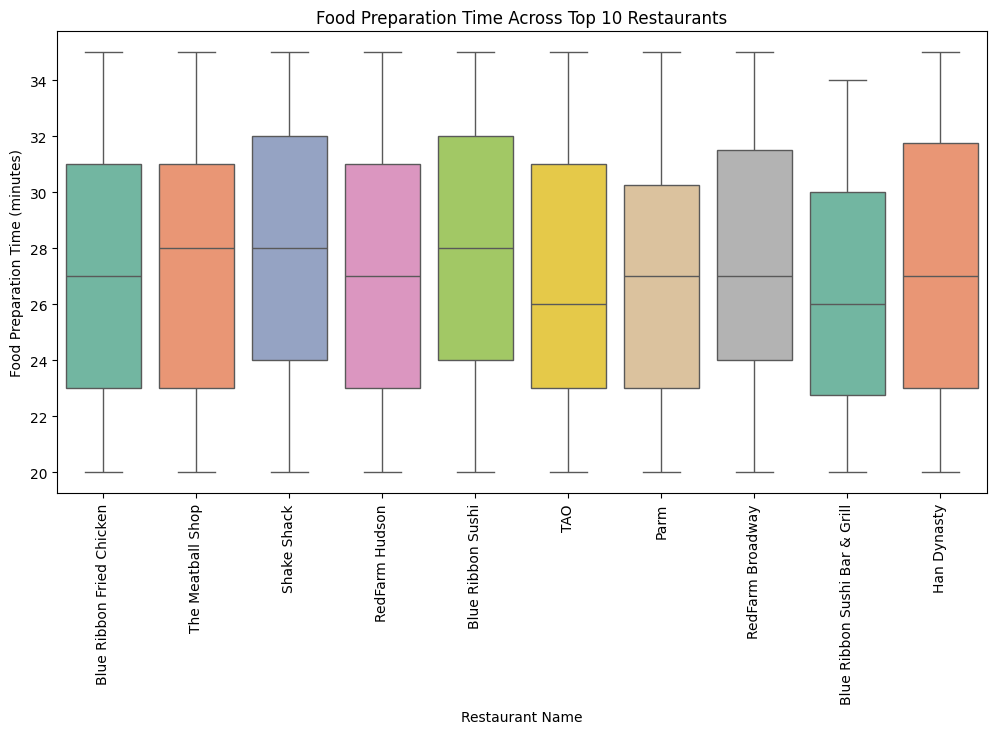

In [95]:
# Get the top 10 restaurants with the most orders
top_restaurants = df['restaurant_name'].value_counts().head(10).index

# Filter data to include only top 10 restaurants
filtered_df = df[df['restaurant_name'].isin(top_restaurants)]

# find median food_preparation_time among all resturants and sort by median value
print("Slowest food preparing resturant")
print(df.groupby('restaurant_name')['food_preparation_time'].median().sort_values(ascending=False).head(2))
print("Fastest food preparing resturant")
print(df.groupby('restaurant_name')['food_preparation_time'].median().sort_values(ascending=False).tail(1))

# Boxplot for food preparation time by top 10 restaurants
plt.figure(figsize=(12, 6))
sns.boxplot(x='restaurant_name', y='food_preparation_time', data=filtered_df, palette='Set2')
plt.xticks(rotation=90)
plt.title('Food Preparation Time Across Top 10 Restaurants')
plt.xlabel('Restaurant Name')
plt.ylabel('Food Preparation Time (minutes)')
plt.show()

# Observation 5. Fastest avg food preparation is by 'Haru Gramercy Park' and slowest avg is by 'Sushi Choshi'


<ipython-input-99-043b5bc57aa6>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='cuisine_type', y='cost_of_the_order', data=df, palette='Set3')


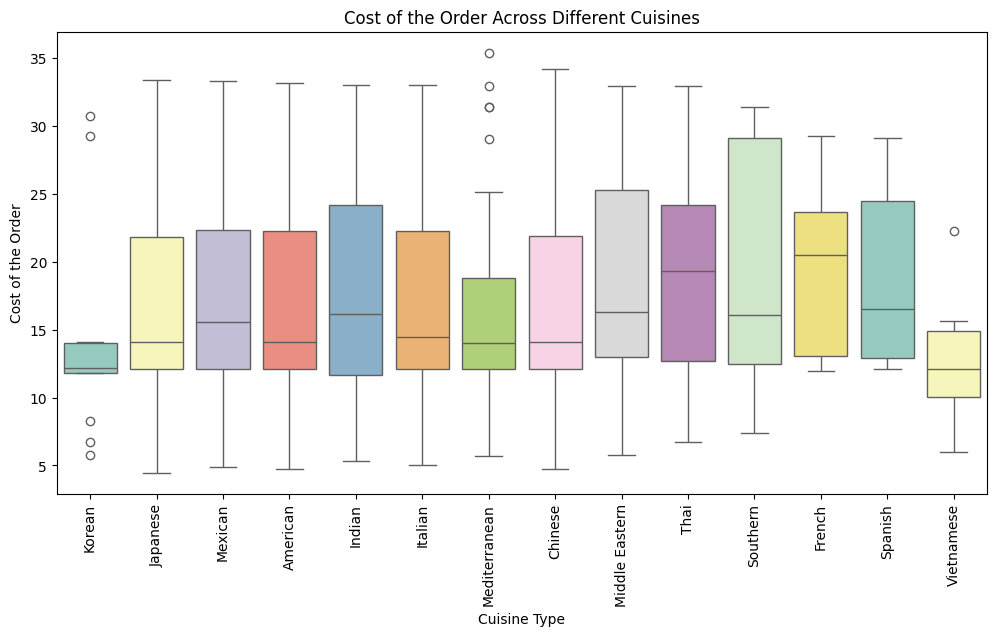

In [99]:
# Comparing cuisine type with cost of the order
plt.figure(figsize=(12, 6))
sns.boxplot(x='cuisine_type', y='cost_of_the_order', data=df, palette='Set3')
plt.title('Cost of the Order Across Different Cuisines')
plt.xlabel('Cuisine Type')
plt.ylabel('Cost of the Order')
plt.xticks(rotation=90)
plt.show()

# Observation 6. Mediterranean cuisine has the highest cost of order ever at $36

<ipython-input-98-0dfdfb0b60a0>:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='cuisine_type', y='food_preparation_time', data=df, palette='muted')


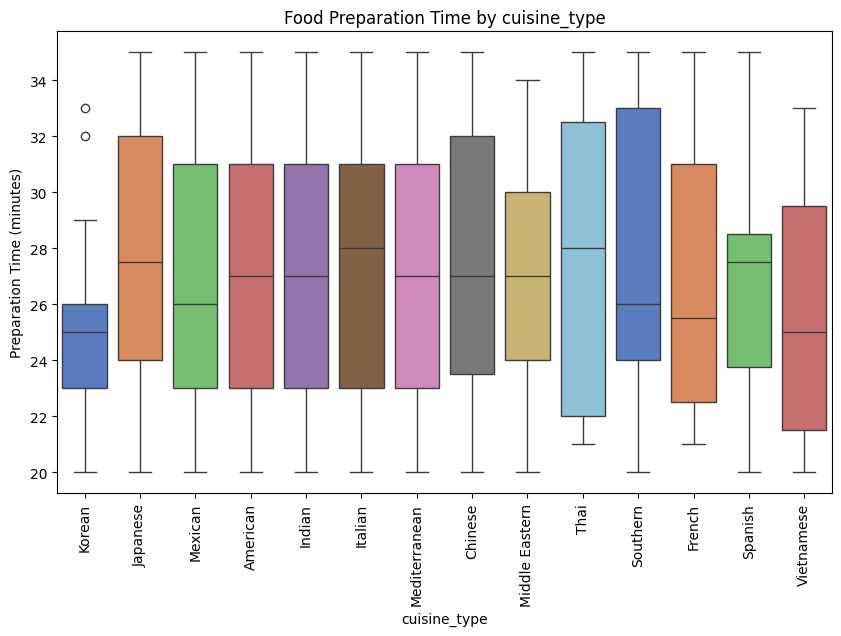

In [98]:
plt.figure(figsize=(10, 6))
sns.boxplot(x='cuisine_type', y='food_preparation_time', data=df, palette='muted')
plt.title('Food Preparation Time by cuisine_type')
plt.xlabel('cuisine_type')
plt.ylabel('Preparation Time (minutes)')
plt.xticks(rotation=90)
plt.show()

# Observation 7. Italian and thai have the highest avg preparation time, lowest is for Korean


In [101]:
# Find the number of unique restaurants serving each cuisine
cuisine_restaurant_count = df.groupby('cuisine_type')['restaurant_name'].nunique()

# Identify the cuisine served by the most restaurants
most_served_cuisine = cuisine_restaurant_count.idxmax()
most_served_cuisine_count = cuisine_restaurant_count.max()

print(f"The cuisine served by the most restaurants is {most_served_cuisine} with {most_served_cuisine_count} restaurants.")

# Observation 8. American cuisine is servered in highest number of resturants at 41.

The cuisine served by the most restaurants is American with 41 restaurants.


In [114]:
# find median food_preparation_time among all resturants and sort by median value
print("Slowest food delivery resturant")
print(df.groupby('restaurant_name')['delivery_time'].mean().sort_values(ascending=False).head(2))
print("Fastest food delivery resturant")
print(df.groupby('restaurant_name')['delivery_time'].mean().sort_values(ascending=False).tail(1))

# Observation 9. Among all resturants delivery from 'Sarabeth's West' takes the highest time (indicating further away from most orders). Also from 'Gaia Italian Cafe' it takes the least time to deliver (indicating nearest to its customers)

Slowest food delivery resturant
restaurant_name
Sarabeth's West   33.000
Taro Sushi        32.000
Name: delivery_time, dtype: float64
Fastest food delivery resturant
restaurant_name
Gaia Italian Cafe   15.000
Name: delivery_time, dtype: float64


In [116]:
## Finding which cuisine is usually the best rated.
print("Best avg rated cuisine")
print(df.groupby('cuisine_type')['rating'].mean().sort_values(ascending=False).head(2))
print("Least avg rated cuisine")
print(df.groupby('cuisine_type')['rating'].mean().sort_values(ascending=False).tail(2))

# Observation 10. Best avg rating for a cuisine is Spansish with 4.589
# Observation 11. Worst avg rated cuisine is Vietnamese with 4.098

Best avg rated cuisine
cuisine_type
Spanish   4.589
Thai      4.497
Name: rating, dtype: float64
Least avg rated cuisine
cuisine_type
Korean       4.183
Vietnamese   4.098
Name: rating, dtype: float64


### **Question 13:** The company wants to provide a promotional offer in the advertisement of the restaurants. The condition to get the offer is that the restaurants must have a rating count of more than 50 and the average rating should be greater than 4. Find the restaurants fulfilling the criteria to get the promotional offer. [3 marks]

In [134]:
# Write the code here
# Since we have already imputed the value of rating with mean in df dataset, here we will use the copy dataset called orig_data

records_with_ratings=orig_data[orig_data['rating']!='Not given']
records_with_ratings['rating']=records_with_ratings['rating'].astype(float)

# records_with_ratings.groupby('restaurant_name').filter(lambda x: x['rating'].count()>50 and x['rating'].mean()>4)

print(records_with_ratings.groupby('restaurant_name').filter(lambda x: x['rating'].count()>50 and x['rating'].mean()>4)['restaurant_name'].unique())


['Blue Ribbon Fried Chicken' 'Shake Shack' 'Blue Ribbon Sushi'
 'The Meatball Shop']


<ipython-input-134-2a6e916e9ba2>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  records_with_ratings['rating']=records_with_ratings['rating'].astype(float)


#### Observations: The resturants with more than 50 rating and avg rating of more than 4 are -
 - 'Blue Ribbon Fried Chicken'
 - 'Shake Shack'
 - 'Blue Ribbon Sushi'
 - 'The Meatball Shop'


### **Question 14:** The company charges the restaurant 25% on the orders having cost greater than 20 dollars and 15% on the orders having cost greater than 5 dollars. Find the net revenue generated by the company across all orders. [3 marks]

In [137]:
# Write the code here
df['revenue_by_order'] = df['cost_of_the_order'].apply(lambda x: x*0.25 if x > 20 else x*0.15 if x > 5 else 0)
total_revenue = df['revenue_by_order'].sum()
print(f"The net revenue generated by the company across all orders is ${total_revenue:.2f}")

The net revenue generated by the company across all orders is $6166.30


#### Observations: Total revenue generated by the company is $6166.30


### **Question 15:** The company wants to analyze the total time required to deliver the food. What percentage of orders take more than 60 minutes to get delivered from the time the order is placed? (The food has to be prepared and then delivered.) [2 marks]

In [139]:
# Write the code here
df['total_time'] = df['food_preparation_time']+df['delivery_time']
df[df['total_time']>60].shape[0]/df.shape[0]*100

10.537407797681771

#### Observations: 10.5% of the orders took more than 60 mins to get delivered.


### **Question 16:** The company wants to analyze the delivery time of the orders on weekdays and weekends. How does the mean delivery time vary during weekdays and weekends? [2 marks]

In [142]:
# Write the code here
mean_delivery_time_weekday = df[df['day_of_the_week']=='Weekday']['delivery_time'].mean()
mean_delivery_time_weekend = df[df['day_of_the_week']=='Weekend']['delivery_time'].mean()

print(f"Mean delivery time during weekdays: {mean_delivery_time_weekday:.2f} minutes")
print(f"Mean delivery time during weekends: {mean_delivery_time_weekend:.2f} minutes")

Mean delivery time during weekdays: 28.34 minutes
Mean delivery time during weekends: 22.47 minutes


#### Observations: Delivery time on weekdays is about 6 mins higher than that on weekends. Avg on weekdays is 28.34 mins and avg on weekends is 22.47 mins.


### Conclusion and Recommendations

### **Question 17:** What are your conclusions from the analysis? What recommendations would you like to share to help improve the business? (You can use cuisine type and feedback ratings to drive your business recommendations.) [6 marks]

In [154]:
## Finding which cuisine is usually the best rated.
print("Best avg rated cuisine")
print(df.groupby('cuisine_type')['rating'].mean().sort_values(ascending=False).head(4))
print("Least avg rated cuisine")
print(df.groupby('cuisine_type')['rating'].mean().sort_values(ascending=False).tail(4))

print("Best avg revenue cuisine")
print(df.groupby('cuisine_type')['cost_of_the_order'].mean().sort_values(ascending=False).head(4))
print("Least avg revenue cuisine")
print(df.groupby('cuisine_type')['cost_of_the_order'].mean().sort_values(ascending=False).tail(4))


Best avg rated cuisine
cuisine_type
Spanish   4.589
Thai      4.497
Indian    4.478
Mexican   4.389
Name: rating, dtype: float64
Least avg rated cuisine
cuisine_type
Middle Eastern   4.269
Mediterranean    4.257
Korean           4.183
Vietnamese       4.098
Name: rating, dtype: float64
Best avg revenue cuisine
cuisine_type
French     19.794
Southern   19.301
Thai       19.208
Spanish    18.994
Name: cost_of_the_order, dtype: float64
Least avg revenue cuisine
cuisine_type
Japanese        16.305
Mediterranean   15.475
Korean          14.002
Vietnamese      12.883
Name: cost_of_the_order, dtype: float64


### Conclusions:
* Top Restaurants: Shake Shack, The Meatball Shop, and Blue Ribbon Sushi are the top resturants in terms of order volume.

* Cuisine Popularity: American cuisine dominates on weekends.

* Order Costs: Almost 30% of orders exceed $20.

* Delivery Time: The average delivery time is approximately 24 minutes.  Delivery times are longer on weekdays.

* Customer Loyalty: Customers 52832, 47440, and 83287 are the most frequent customers.  Customer 52832 has the most diverse palate (8 cuisines tried) and tried the most restaurants (8 different ones).  Customer 97991 appears to be very loyal to one restaurant (Blue Ribbon Sushi Bar and Grill).

* Revenue Generation: The company generates a total revenue of $6166.30 based on the commission structure.

* Order Fulfillment Time:  A significant portion (10.5%) of orders take longer than 60 minutes to be delivered (preparation + delivery).

* Cuisine Performance: Spanish and Mexican cuisines have higher ratings than Vietnamese and Korean, while French cuisine is among the most expensive, indicating a potential price-to-value factor.  American cuisine is offered by the most restaurants.

* Restaurant Performance: 'Haru Gramercy Park' prepares food the fastest and 'Sushi Choshi' is the slowest.  'Sarabeth's West' has the longest average delivery times, likely due to distance, while 'Gaia Italian Cafe' has the shortest.



### Recommendations:

*  Targeted Promotions: Offer promotions to the top 3 customers (52832, 47440, 83287) and consider loyalty programs to retain them.  Given customer 97991's loyalty to Blue Ribbon Sushi, consider targeted promotions for this restaurant and others like it.

* Optimize Delivery Times: Investigate the reasons for long delivery times (especially for 'Sarabeth's West'). Consider optimizing routes, delivery personnel allocation, or alternative delivery methods.

* Enhance Customer Experience: Focus on improving food preparation times at 'Sushi Choshi' as this contributes significantly to overall order completion time.

* Menu Engineering: Given the popularity of certain cuisines (American and Japanese), consider expanding these options or offering variations to cater to broader demands.  Review the pricing of the least popular and lowest revenue generating cuisines.

* Promotional Offers: Give promotional offers to restaurants like 'Blue Ribbon Fried Chicken', 'Shake Shack', 'Blue Ribbon Sushi' and 'The Meatball Shop' because of their high ratings.

* Strategic Partnerships: Collaborate with highly-rated restaurants (particularly Spanish and Mexican cuisines) to attract new customers.

* Marketing and advertising campaigns: Promote the highly rated Spanish and Mexican cuisine more as these cuisine have higher ratings and popularity.


---